In [115]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning

In [116]:
df_list = []
correlations = []

for i in range(1, 45):
    filename = f"Friskis1_team_data_{i}min.csv"
    df_i = pd.read_csv(filename)
    df_i = df_i.replace(to_replace=0, value=-999)
    df_list.append(df_i)
    corr = df_i.corr()
    correlations.append(corr)

In [ ]:
corr_4 = correlations[3]

In [117]:
def plot_correlation_matrix(correlations, cmap="GnBu"):
    for i in range(len(correlations)):
        fig, ax = plt.subplots(figsize=(6, 6))
        sns.heatmap(correlations[i]["Win"].sort_values(ascending=False).drop("Win").to_frame(), vmin=-1, vmax=1, annot=True, cmap=cmap)
        plt.show()

# plot_correlation_matrix(correlations)

In [118]:
def evaluate_model(model, X_train, y_train, X_test, y_test, digits=4, figsize=(10,5), params=False):
    # Get Predictions
    y_hat_test = model.predict(X_test)
    y_hat_train = model.predict(X_train)

    # Classification Report / Scores
    print("****CLASSIFICATION REPORT - TRAINING DATA****")
    print(classification_report(y_train, y_hat_train, digits=digits))

    print("****CLASSIFICATION REPORT - TEST DATA****")
    print(classification_report(y_test, y_hat_test, digits=digits))

    print("****CONFUSION MATRIX****")
    fig, axes = plt.subplots(ncols=1, figsize=figsize)

    # Confusion Matrix
    disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, normalize='true', cmap='Purples', ax=axes)
    disp.ax_.set_title('Confusion Matrix')

    if params == True:
        print("****MODEL PARAMETERS****")
        params = pd.DataFrame(pd.Series(model.get_params()))
        params.columns=['parameters']
        display(params)

def fit_eval(model, X_train, y_train, X_test, y_test, digits=4, figsize=(10,5), params=False):
    model.fit(X_train, y_train)

    evaluate_model(model, X_train, y_train, X_test, y_test, digits=digits, figsize=figsize, params=params)

    return model


In [128]:
#We will first set the complete DataFrames
x_keep_original = ['Gold', 'Level', 'Minions', 'Kills', 'Assists', 'Deaths', 'Towers', 'Dragons', 'Heralds','Barons', 'Gold_diff']
X_original = correlations[15][x_keep_original]
X_original = X_original.fillna(0)
y_original = correlations[15]["Win"]
y_original = y_original.fillna(0)

X_train, X_test, y_train, y_test = train_test_split(X_original, y_original, test_size=0.333333, random_state=42)

In [129]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator
import matplotlib.ticker as mticker

# Import the necessary libraries

le = LabelEncoder()

# Split the data into a training set and a test set

X_train, X_test, y_train, y_test = train_test_split(X_original, y_original, test_size=0.333333, random_state=42)

# Convert the values in the y variable to categorical values

le.fit(np.concatenate([y_train, y_test]))
y_train = le.transform(y_train)
y_test = le.transform(y_test)

# Train the logistic regression model

logreg = LogisticRegression(solver="lbfgs", max_iter=1000)
logreg.fit(X_train, y_train)

# Evaluate the model on the test set

y_pred = logreg.predict(X_test)
print(classification_report(y_test, y_pred))

# Plot the confusion matrix

cm = confusion_matrix(y_test, y_pred)
locator = mticker.FixedLocator([0, 1])
plt.clf()
disp = ConfusionMatrixDisplay(cm, display_labels=["Lose", "Win"])
disp.plot(cmap="Blues", locator=locator)
plt.show()


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       1.0
           2       0.00      0.00      0.00       1.0
           6       0.00      0.00      0.00       0.0
           8       0.00      0.00      0.00       0.0
           9       0.00      0.00      0.00       1.0
          10       0.00      0.00      0.00       1.0
          11       0.00      0.00      0.00       0.0

    accuracy                           0.00       4.0
   macro avg       0.00      0.00      0.00       4.0
weighted avg       0.00      0.00      0.00       4.0



C:\Users\zabit\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\zabit\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\zabit\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

TypeError: plot() got an unexpected keyword argument 'locator'

<Figure size 640x480 with 0 Axes>

ValueError: The number of FixedLocator locations (4), usually from a call to set_ticks, does not match the number of ticklabels (2).

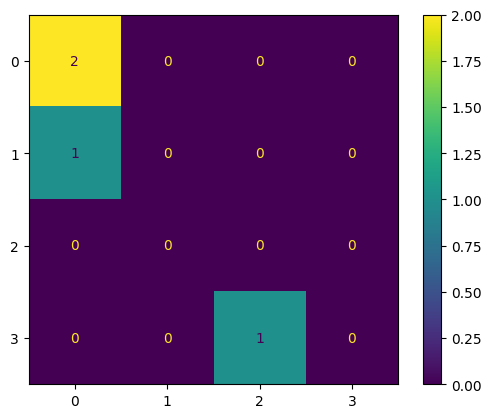

In [113]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=["Lose", "Win"])
disp.plot()
plt.show()

In [86]:
def evaluate_model(model, X_train, y_train, X_test, y_test, digits=5, zero_division=True):
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    predictions = model.predict(X_test)

    # Compute classification report
    report = classification_report(y_test_cat, predictions, digits=digits, zero_division=zero_division)

    # Print formatted classification report
    print(f"Classification Report:\n{report}")

    # Compute confusion matrix
    confusion_matrix_data = confusion_matrix(y_test_cat, predictions)

    # Normalize confusion matrix
    normalized_confusion_matrix = confusion_matrix_data.astype('float')
    if confusion_matrix_data.sum(axis=1) == 0:
        normalized_confusion_matrix = confusion_matrix_data.astype('float') / 1 if np.any(confusion_matrix_data) else confusion_matrix_data
    else:
        normalized_confusion_matrix = confusion_matrix_data.astype('float') / confusion_matrix_data.sum(axis=1)[:, np.newaxis]

    # Plot normalized confusion matrix as heatmap
    plt.figure(figsize=(6, 4))
    sns.heatmap(normalized_confusion_matrix, annot=True, cmap='Blues', fmt='.2f')
    plt.title(f"Normalized Confusion Matrix - {type(model).__name__}")
    plt.show()

# Logistic Regression
logistic_model = LogisticRegression(max_iter=1000)
evaluate_model(logistic_model, X_train, y_train_cat, X_test, y_test, digits=4, zero_division=True)

# Decision Tree
decision_tree_model = DecisionTreeClassifier()
evaluate_model(decision_tree_model, X_train, y_train_cat, X_test, y_test, digits=4, zero_division=True)

# Random Forest
random_forest_model = RandomForestClassifier()
evaluate_model(random_forest_model, X_train, y_train_cat, X_test, y_test, zero_division=True)

# Support Vector Machines (SVM)
svm_model = SVC()
evaluate_model(svm_model, X_train, y_train_cat, X_test, y_test, zero_division=True)

# K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier()
evaluate_model(knn_model, X_train, y_train_cat, X_test, y_test, zero_division=True)

# Neural Networks
neural_network_model = MLPClassifier()
evaluate_model(neural_network_model, X_train, y_train_cat, X_test, y_test, zero_division=True)


Classification Report:
              precision    recall  f1-score   support

           0     1.0000    0.0000    0.0000         2
           1     0.3333    1.0000    0.5000         1
           2     1.0000    0.0000    0.0000         1
           3     0.0000    1.0000    0.0000         0

    accuracy                         0.2500         4
   macro avg     0.5833    0.5000    0.1250         4
weighted avg     0.8333    0.2500    0.1250         4



ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()